In [50]:
import random
import gensim
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.decomposition
import sklearn.feature_extraction
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
import seaborn as sns
from wordcloud import WordCloud
from IPython.display import display
from collections import defaultdict


In [51]:
year = '2023'
data_path = f'/Users/naphat-c/Documents/naphat/Data/project/CEDT-DS-Project_LittleMermaid/ExtractedData/{year}.csv'
df = pd.read_csv(data_path)

In [52]:
df.head()

,Title,Abstract,Author,Aggregation_Type,Publisher,Publication_Date,Institutions,Keywords,Filename
0,Graphene oxide-alginate hydrogel-based indicat...,© 2023 Elsevier B.V.Pyrocatechol violet/copper...,Boobphahom S.; Rodthongkum N.,Journal,Elsevier B.V.,2023-12-31,Chulalongkorn University; Mahidol University; ...,Alzheimer's disease; Hydrogel colorimetric sen...,202300000
1,Rare coordination behavior of triethanolamine ...,"© 2023 Elsevier B.V.Herein, unusual and rare c...",Chauhan C.; Kumar R.; Saini A.; Kumar R.; Kuma...,Journal,Elsevier B.V.,2023-12-15,Himachal Pradesh University; Punjabi Universit...,Copper(II); Hirshfeld calculations; Molecular ...,202300001
2,Total ammonia nitrogen removal and microbial c...,© 2023 Elsevier B.V.This study assessed the ch...,Satanwat P.; Tapaneeyaworawong P.; Wechprasit ...,Journal,Elsevier B.V.,2023-12-15,National Science and Technology Development Ag...,Ammonia removal; Carrying capacity; Microbiome...,202300002
3,Effects of microaeration and sludge recirculat...,© 2023 Elsevier B.V.A novel anaerobic baffled ...,Buakaew T.; Ratanatamskul C.,Journal,Elsevier B.V.,2023-12-10,Chulalongkorn University; Chulalongkorn Univer...,Anaerobic baffled biofilm–MBR (AnBB-MBR); Memb...,202300003
4,Bioaccumulation of heavy metals in commerciall...,© 2023 Elsevier B.V.Safety of aquatic products...,Patchaiyappan A.; Arulkumar A.; Shynshiang K.;...,Journal,Elsevier B.V.,2023-12-10,French Institute of Pondicherry; Achariya Arts...,Contamination; Health risk assessment; Heavy m...,202300004


In [53]:
df['Publication_Date'] = pd.to_datetime(df['Publication_Date'])
df['Quarter'] = df['Publication_Date'].dt.quarter
quarter_counts = df['Quarter'].value_counts().sort_index()
quarter_counts

Quarter
1    1514
2     591
3     504
4     281
Name: count, dtype: int64

In [54]:
data = {
    "Year": [2018, 2019, 2020, 2021, 2022, 2023],
    "Q1": [1095, 1340, 1344, 1402, 1686, 1514],
    "Q2": [550, 507, 607, 696, 743, 591],
    "Q3": [563, 533, 667, 725, 784, 504],
    "Q4": [584, 702, 775, 992, 1031, 281],
}

In [55]:
df = pd.DataFrame(data)

In [56]:
# แยก Features (ปี) และ Target (แต่ละไตรมาส)
X = df["Year"].values.reshape(-1, 1)  # ต้อง reshape เพื่อให้ใช้ในโมเดลได้
pred_years = np.array([2024, 2025]).reshape(-1, 1)  # ปีที่ต้องการพยากรณ์

In [57]:
def predict_quarter(quarter):
    y = df[quarter].values  # เลือกไตรมาสที่ต้องการ
    model = LinearRegression()  # โมเดล Linear Regression
    model.fit(X, y)  # เทรนโมเดล
    predictions = model.predict(pred_years)  # พยากรณ์ค่าปี 2024 และ 2025
    return predictions

In [58]:
results = {}
for quarter in ["Q1", "Q2", "Q3", "Q4"]:
    predictions = predict_quarter(quarter)
    results[quarter] = {
        "2024": predictions[0],
        "2025": predictions[1],
    }

In [59]:
print("Predicted values for 2024 and 2025:")
for quarter, values in results.items():
    print(f"{quarter}: 2024 -> {values['2024']:.2f}, 2025 -> {values['2025']:.2f}")

Predicted values for 2024 and 2025:
Q1: 2024 -> 1715.93, 2025 -> 1807.10
Q2: 2024 -> 715.87, 2025 -> 744.50
Q3: 2024 -> 680.93, 2025 -> 695.68
Q4: 2024 -> 696.40, 2025 -> 687.51


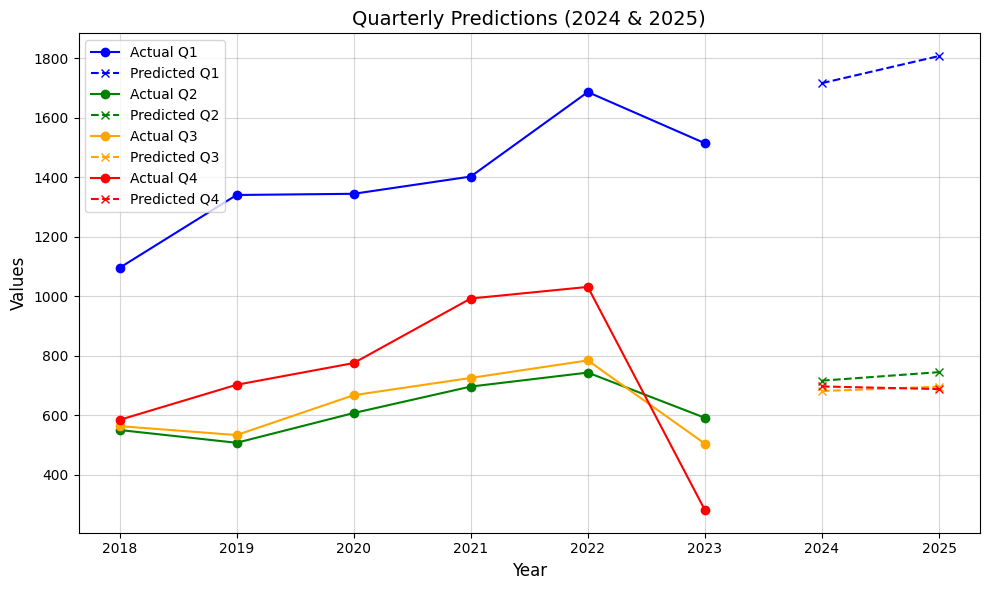

In [60]:
# การแสดงผลกราฟ
plt.figure(figsize=(10, 6))
colors = ["blue", "green", "orange", "red"]

for i, quarter in enumerate(["Q1", "Q2", "Q3", "Q4"]):
    y = df[quarter].values
    plt.plot(
        df["Year"], y, label=f"Actual {quarter}", color=colors[i], marker="o"
    )
    plt.plot(
        [2024, 2025],
        [results[quarter]["2024"], results[quarter]["2025"]],
        label=f"Predicted {quarter}",
        color=colors[i],
        linestyle="--",
        marker="x",
    )

# ปรับแต่งกราฟให้เรียบง่าย
plt.xticks(range(2018, 2026), fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.title("Quarterly Predictions (2024 & 2025)", fontsize=14)
plt.legend(fontsize=10, loc="upper left")
plt.grid(alpha=0.5)
plt.tight_layout()

plt.show()